# Importing the Required Packages

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

# Importing the Feeds Data and Cleaning the data

In [5]:
df=pd.read_csv("VN0101.csv")

In [6]:
df.head()

,created_at,entry_id,field1,field2,field3,field4,field5,latitude,longitude,elevation,status
0,1970-01-01 05:31:51 IST,1,85.00,0.0,0.0,0.0,7.0,NaN,NaN,NaN,NaN
1,1970-01-01 05:32:09 IST,2,24.37,0.0,0.0,0.0,7.0,NaN,NaN,NaN,NaN
2,1970-01-01 05:32:27 IST,3,24.37,0.0,0.0,0.0,7.0,NaN,NaN,NaN,NaN
3,1970-01-01 05:32:47 IST,4,24.37,0.0,0.0,0.0,7.0,NaN,NaN,NaN,NaN
4,1970-01-01 05:33:02 IST,5,24.37,0.0,0.0,0.0,7.0,NaN,NaN,NaN,NaN


In [8]:
headers=["Time_Stamp","Entry_ID","Temperature","TDS_VOltage","TDSwithoutT","TDSwithT","Water_Level","Latitude","Longitude","Elevation","Status"]

In [9]:
headers

['Time_Stamp',
 'Entry_ID',
 'Temperature',
 'TDS_VOltage',
 'TDSwithoutT',
 'TDSwithT',
 'Water_Level',
 'Latitude',
 'Longitude',
 'Elevation',
 'Status']

In [10]:
df.columns=headers

In [11]:
df.head()

,Time_Stamp,Entry_ID,Temperature,TDS_VOltage,TDSwithoutT,TDSwithT,Water_Level,Latitude,Longitude,Elevation,Status
0,1970-01-01 05:31:51 IST,1,85.00,0.0,0.0,0.0,7.0,NaN,NaN,NaN,NaN
1,1970-01-01 05:32:09 IST,2,24.37,0.0,0.0,0.0,7.0,NaN,NaN,NaN,NaN
2,1970-01-01 05:32:27 IST,3,24.37,0.0,0.0,0.0,7.0,NaN,NaN,NaN,NaN
3,1970-01-01 05:32:47 IST,4,24.37,0.0,0.0,0.0,7.0,NaN,NaN,NaN,NaN
4,1970-01-01 05:33:02 IST,5,24.37,0.0,0.0,0.0,7.0,NaN,NaN,NaN,NaN


In [12]:
dfplt=df[["Time_Stamp","Temperature","TDS_VOltage","TDSwithoutT","TDSwithT","Water_Level"]]

In [13]:
dfplt


,Time_Stamp,Temperature,TDS_VOltage,TDSwithoutT,TDSwithT,Water_Level
0,1970-01-01 05:31:51 IST,85.00,0.0,0.0,0.0,7.0
1,1970-01-01 05:32:09 IST,24.37,0.0,0.0,0.0,7.0
2,1970-01-01 05:32:27 IST,24.37,0.0,0.0,0.0,7.0
3,1970-01-01 05:32:47 IST,24.37,0.0,0.0,0.0,7.0
4,1970-01-01 05:33:02 IST,24.37,0.0,0.0,0.0,7.0
...,...,...,...,...,...,...
1945,2020-12-11 11:04:12 IST,22.87,0.0,0.0,0.0,14.0
1946,2020-12-11 11:06:37 IST,22.87,0.0,0.0,0.0,14.0
1947,2020-12-11 11:09:07 IST,22.94,0.0,0.0,0.0,14.0
1948,2020-12-11 11:11:47 IST,22.94,0.0,0.0,0.0,14.0


In [15]:
df_plot=dfplt[dfplt["TDSwithoutT"]>40]

In [16]:
df_plot=df_plot[df_plot["TDSwithoutT"]<100]

In [17]:
df_plot=df_plot[df_plot["Water_Level"]>0]

In [18]:
df_plot=df_plot[df_plot["Water_Level"]<=20]

In [19]:
df_plot["Temperature"]=df_plot["Temperature"].astype("float")


In [20]:
df_plot=df_plot[df_plot["Temperature"]>20]

In [21]:
df_plot=df_plot[df_plot["Temperature"]<30]

# Plotting the data from last 15 days

In [22]:
df_plot.dtypes

Time_Stamp      object
Temperature    float64
TDS_VOltage    float64
TDSwithoutT    float64
TDSwithT       float64
Water_Level    float64
dtype: object

In [23]:
df_plot["Time_Stamp"]=df_plot["Time_Stamp"].astype('datetime64[ns, US/Eastern]')

C:\Users\suhas\anaconda3\lib\site-packages\dateutil\parser\_parser.py:1213: UnknownTimezoneWarning: tzname IST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [24]:
df_plot.dtypes

Time_Stamp     datetime64[ns, US/Eastern]
Temperature                       float64
TDS_VOltage                       float64
TDSwithoutT                       float64
TDSwithT                          float64
Water_Level                       float64
dtype: object

In [25]:
df_plot.to_csv("FFEED_0101.csv")

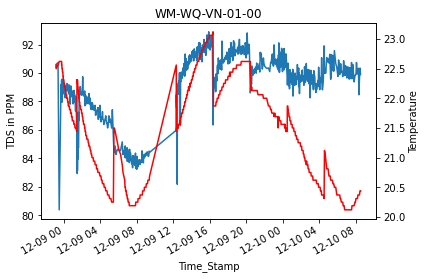

In [28]:
df_plot_main=df_plot.set_index('Time_Stamp')
ax1 = df_plot_main["TDSwithoutT"].plot()
plt.ylabel("TDS in PPM")
ax2 = ax1.twinx()
ax2.spines['right'].set_position(('axes', 1.0))
df_plot_main["Temperature"].plot(ax=ax2, color="red")
plt.ylabel("Temperature")
plt.title("WM-WQ-VN-01-00")
plt.savefig('WM-WQ-VN-01-01', dpi=600)

In [29]:
df_plot.describe()

,Temperature,TDS_VOltage,TDSwithoutT,TDSwithT,Water_Level
count,864.000000,864.000000,864.000000,864.000000,864.000000
mean,21.527315,0.205637,89.090718,89.090718,6.123843
std,0.795999,0.008561,2.335608,2.335608,0.336551
min,20.120000,0.190000,80.380000,80.380000,5.000000
25%,20.810000,0.200000,88.370000,88.370000,6.000000
50%,21.590000,0.210000,89.665000,89.665000,6.000000
75%,22.130000,0.210000,90.752500,90.752500,6.000000
max,23.120000,0.220000,92.900000,92.900000,8.000000


# Plotting 1 Day Data :

In [30]:
df_oneday=df_plot_main.tail(823)

In [31]:
df_oneday.describe()

,Temperature,TDS_VOltage,TDSwithoutT,TDSwithT,Water_Level
count,823.000000,823.000000,823.000000,823.000000,823.000000
mean,21.480401,0.205443,89.105504,89.105504,6.128797
std,0.786023,0.008700,2.370583,2.370583,0.335179
min,20.120000,0.190000,82.180000,82.180000,6.000000
25%,20.750000,0.200000,88.330000,88.330000,6.000000
50%,21.560000,0.210000,89.740000,89.740000,6.000000
75%,22.060000,0.210000,90.780000,90.780000,6.000000
max,23.120000,0.220000,92.900000,92.900000,7.000000


Text(0.5, 1.0, 'TDS Variation in One day')

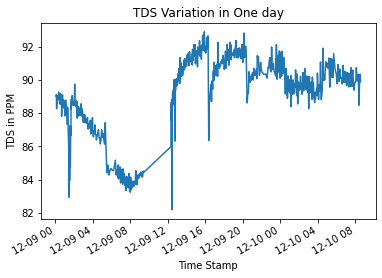

In [32]:
df_oneday["TDSwithoutT"].plot()
plt.xlabel("Time Stamp")
plt.ylabel("TDS in PPM")
plt.title("TDS Variation in One day")

Text(0.5, 1.0, 'Temperature Variation in One day')

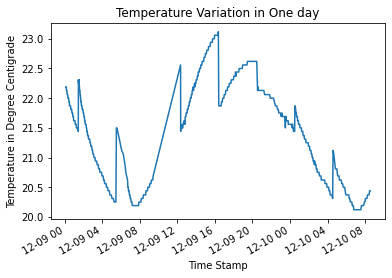

In [33]:
df_oneday["Temperature"].plot()
plt.xlabel("Time Stamp")
plt.ylabel("Temperature in Degree Centigrade")
plt.title("Temperature Variation in One day")

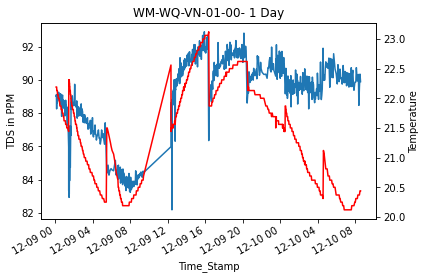

In [36]:

ax1 = df_oneday["TDSwithoutT"].plot()
plt.ylabel("TDS in PPM")
ax2 = ax1.twinx()
ax2.spines['right'].set_position(('axes', 1.0))
df_oneday["Temperature"].plot(ax=ax2, color="red")
plt.ylabel("Temperature")
plt.title("WM-WQ-VN-01-00- 1 Day")
plt.savefig('WM-WQ-VN-01-01- 1 Day', dpi=600)

Text(0.5, 1.0, 'Water Level Variation in One day')

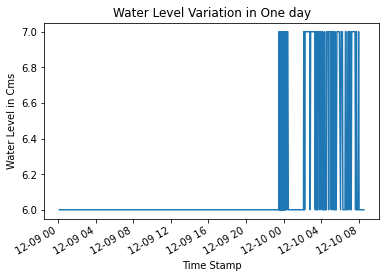

In [37]:
df_oneday["Water_Level"].plot()
plt.xlabel("Time Stamp")
plt.ylabel("Water Level in Cms")
plt.title("Water Level Variation in One day")

In [38]:
df_oneday.corr()

,Temperature,TDS_VOltage,TDSwithoutT,TDSwithT,Water_Level
Temperature,1.000000,0.807226,0.563760,0.563760,-0.314609
TDS_VOltage,0.807226,1.000000,0.859667,0.859667,-0.065505
TDSwithoutT,0.563760,0.859667,1.000000,1.000000,0.168367
TDSwithT,0.563760,0.859667,1.000000,1.000000,0.168367
Water_Level,-0.314609,-0.065505,0.168367,0.168367,1.000000
